In [1]:
import os, sys
curr_dir = os.getcwd()
parent_dir = os.path.dirname(curr_dir)
sys.path.insert(0, parent_dir)

In [2]:
import pandas as pd

In [3]:
# Assign ticker to TSLA
ticker = "TSLA"

"""Import and Instantiate class"""
from scripts.forecasting_future_market_trends import ForecastFutureMarkets
future_market_forecaster = ForecastFutureMarkets(ticker, "../data/preprocessed_data.csv")

2025-03-03 23:24:34.623500: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-03 23:24:37.573314: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-03 23:24:37.590182: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-03-03 23:24:45.919367: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Class instantiated!


In [4]:
# Load all models
future_market_forecaster.load_all_models()


****************************************************************************************************
Loading models...
Model loaded successfully from /home/am/Documents/Software Development/10_Academy Training/week-11/portfolio-management-optimization/models/arima_model.pkl
Model loaded successfully from /home/am/Documents/Software Development/10_Academy Training/week-11/portfolio-management-optimization/models/sarima_model.pkl
Model loaded successfully from /home/am/Documents/Software Development/10_Academy Training/week-11/portfolio-management-optimization/models/optimized_arima_model.pkl
Model loaded successfully from /home/am/Documents/Software Development/10_Academy Training/week-11/portfolio-management-optimization/models/lstm_model.h5

****************************************************************************************************


In [5]:
# Generate forecasts
forecast_arima = future_market_forecaster.forecast_arima()
print(f"\nforecast_arima data types:\n {forecast_arima.dtypes}")
forecast_sarima, confidence_interval = future_market_forecaster.forecast_sarima()
print(f"forecast_sarima data:\n {forecast_sarima.head}")
print(f"\nforecast_SARIMA conf intervales .. {confidence_interval.head()}")

forecast_lstm = future_market_forecaster.forecast_lstm()
print(f"\nforecast_lstm data :\n {forecast_lstm.head()}")

/home/am/Documents/Software Development/10_Academy Training/week-11/portfolio-management-optimization/v-portfolio/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/am/Documents/Software Development/10_Academy Training/week-11/portfolio-management-optimization/v-portfolio/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/am/Documents/Software Development/10_Academy Training/week-11/portfolio-management-optimization/v-portfolio/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `

Forecasting using ARIMA completed successfully!
Data forecast by ARIMA
2535    399.820812
2536    400.265615
2537    399.894419
2538    400.452836
2539    400.158819
Name: ARIMA Forecast, dtype: float64

****************************************************************************************************

forecast_arima data types:
 float64
Forecast by SARIMA ...predicted mean
2535    416.002624
2536    425.767905
2537    406.966192
2538    405.147963
2539    396.694723
           ...    
2710    245.025743
2711    233.035454
2712    233.845738
2713    227.955637
2714    238.215575
Name: predicted_mean, Length: 180, dtype: float64
Confidence interval by SARIMA
      lower Close TSLA  upper Close TSLA
2535        401.502300        430.502948
2536        405.511232        446.024578
2537        381.849887        432.082496
2538        375.896560        434.399365
2539        363.376814        430.012633
...                ...               ...
2710       -990.948002       1480.999489
2711

/home/am/Documents/Software Development/10_Academy Training/week-11/portfolio-management-optimization/v-portfolio/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/am/Documents/Software Development/10_Academy Training/week-11/portfolio-management-optimization/v-portfolio/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Forecast by SARIMA ...predicted mean
2535    416.002624
2536    425.767905
2537    406.966192
2538    405.147963
2539    396.694723
           ...    
2710    245.025743
2711    233.035454
2712    233.845738
2713    227.955637
2714    238.215575
Name: predicted_mean, Length: 180, dtype: float64
Confidence interval by SARIMA
      lower Close TSLA  upper Close TSLA
2535        401.502300        430.502948
2536        405.511232        446.024578
2537        381.849887        432.082496
2538        375.896560        434.399365
2539        363.376814        430.012633
...                ...               ...
2710       -990.948002       1480.999489
2711      -1012.667557       1478.738465
2712      -1021.506658       1489.198135
2713      -1036.974398       1492.885671
2714      -1036.219557       1512.650707

[180 rows x 2 columns]
Forecasting using SARIMA completed successfully!

****************************************************************************************************


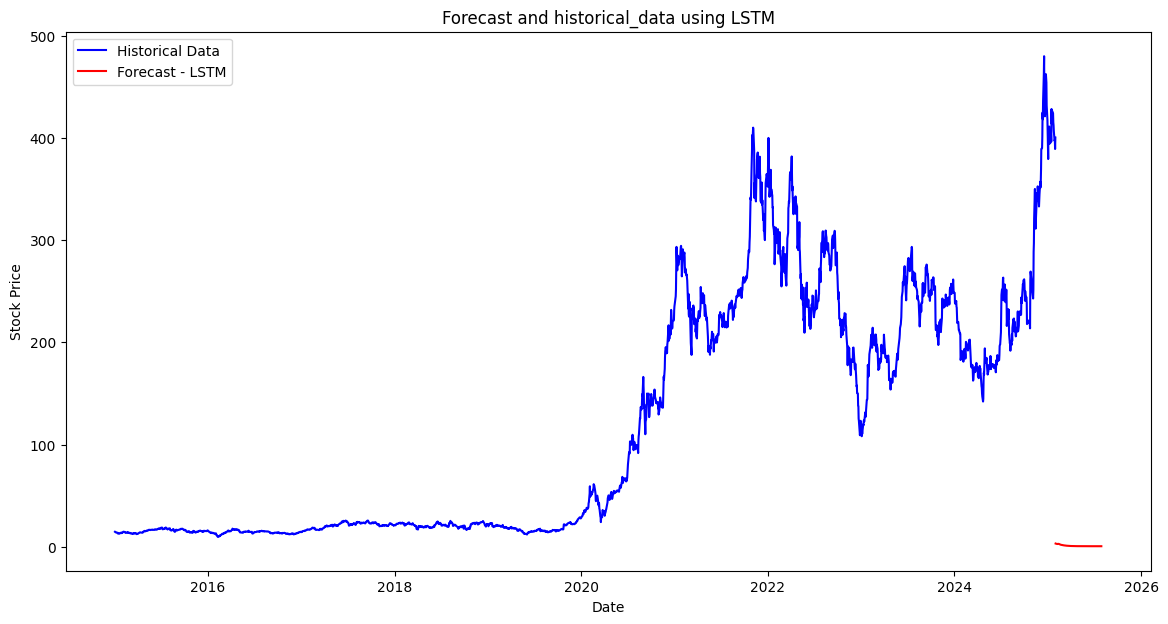

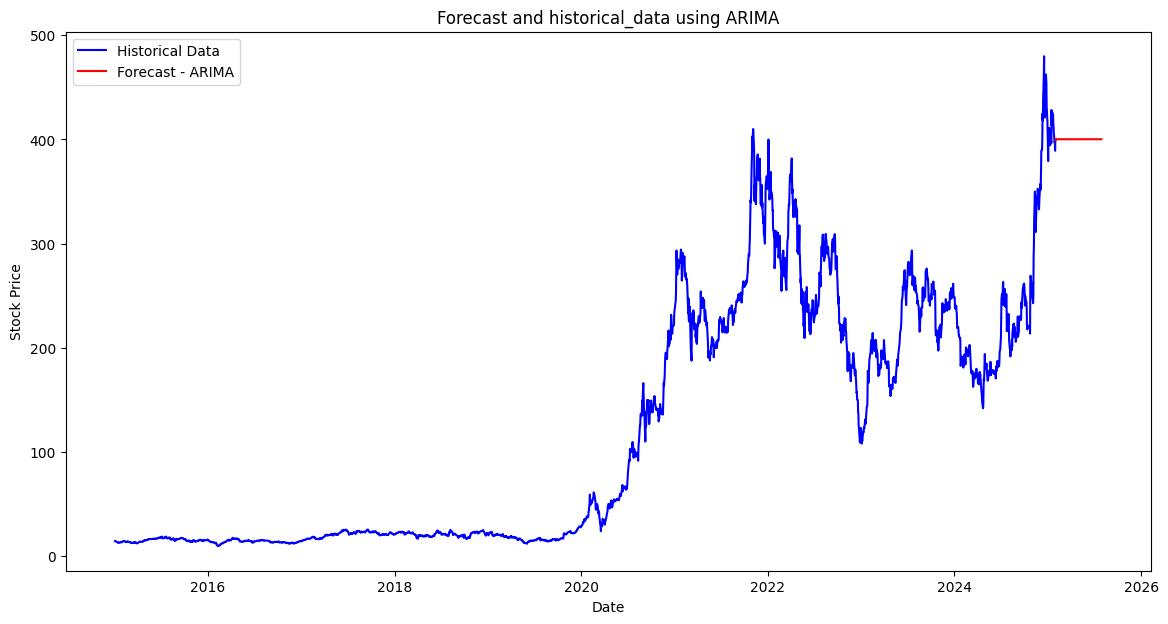

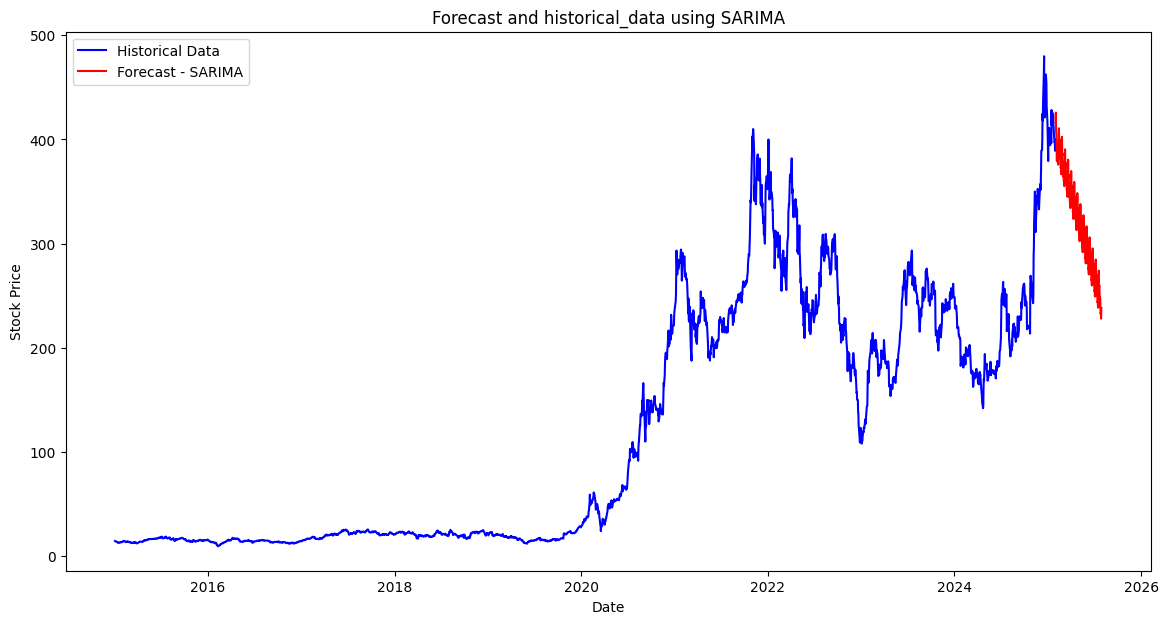

In [7]:
# Visualize forecast data 

# Ensure SARIMA forecast index is a datetime index
sarima_forecast, sarima_conf_int = future_market_forecaster.forecast_sarima(steps=180)

# Generate appropriate date index
sarima_index = pd.date_range(start=future_market_forecaster.data.index[-1], periods=len(sarima_forecast) + 1, freq='D')[1:]

# Convert SARIMA forecast into a DataFrame with correct index
sarima_forecast = pd.Series(sarima_forecast.values, index=sarima_index)

# Now call the visualization function
future_market_forecaster.visualize_forecast(forecast_lstm, "LSTM")
future_market_forecaster.visualize_forecast(forecast_arima, "ARIMA")
future_market_forecaster.visualize_forecast(sarima_forecast, "SARIMA")


In [8]:
# Analyze forecast

# Ensure SARIMA forecast index is a datetime index
sarima_forecast, sarima_conf_int = future_market_forecaster.forecast_sarima(steps=180)

# Generate appropriate date index
sarima_index = pd.date_range(start=future_market_forecaster.data.index[-1], periods=len(sarima_forecast) + 1, freq='D')[1:]

# Convert SARIMA forecast into a DataFrame with correct index
sarima_forecast = pd.Series(sarima_forecast.values, index=sarima_index)
sarima_conf_int.index = sarima_index  # Align confidence intervals

# Now call the analysis function
print("Analysis using ARIMA forecast ...")
future_market_forecaster.analyze_forecast(forecast_arima)
print("Analysis using SARIMA forecast ...")
future_market_forecaster.analyze_forecast(sarima_forecast, sarima_conf_int)
print("Analysis using LSTM forecast ...")
future_market_forecaster.analyze_forecast(forecast_lstm)


Forecast by SARIMA ...predicted mean
2535    416.002624
2536    425.767905
2537    406.966192
2538    405.147963
2539    396.694723
           ...    
2710    245.025743
2711    233.035454
2712    233.845738
2713    227.955637
2714    238.215575
Name: predicted_mean, Length: 180, dtype: float64
Confidence interval by SARIMA
      lower Close TSLA  upper Close TSLA
2535        401.502300        430.502948
2536        405.511232        446.024578
2537        381.849887        432.082496
2538        375.896560        434.399365
2539        363.376814        430.012633
...                ...               ...
2710       -990.948002       1480.999489
2711      -1012.667557       1478.738465
2712      -1021.506658       1489.198135
2713      -1036.974398       1492.885671
2714      -1036.219557       1512.650707

[180 rows x 2 columns]
Forecasting using SARIMA completed successfully!

****************************************************************************************************
Analysi

/home/am/Documents/Software Development/10_Academy Training/week-11/portfolio-management-optimization/v-portfolio/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/am/Documents/Software Development/10_Academy Training/week-11/portfolio-management-optimization/v-portfolio/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
